In [1]:
import pandas as pd
import numpy as np

#to plot the graphs
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder  #to lebel categorical variables
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #import confusion_matrix
from sklearn.metrics import classification_report #import classification_report
from sklearn import preprocessing

In [2]:
main_file_path = 'Adult_Census_Income_Binary_Classification_dataset.csv'
training_data = pd.read_csv(main_file_path)
testing_data = pd.read_csv(main_file_path)

training_data = training_data.replace('[?]',np.NaN,regex=True) #replace "?" into NaN

In [3]:
print(training_data.columns) #print columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')


In [4]:
training_data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [5]:
#Handling missing data by using most comman data

print(training_data.isnull().values.sum()) #get the total number of missing values in the DataFrame
training_data.isnull().sum() #number of missing data

4262


age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [6]:
#chcking most common data in workclass
training_data["workclass"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [7]:
values = {"workclass":training_data["workclass"].value_counts().index[0], 
          "occupation":training_data["occupation"].value_counts().index[0], 
          "native-country":training_data["native-country"].value_counts().index[0]}

training_data = training_data.fillna(value=values)

print(training_data.isnull().values.sum()) #get the total number of missing values in the DataFrame
print(training_data.isnull().sum()) # number of missing data

0
age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [8]:
training_data.dtypes #to find object features

age                int64
workclass         object
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [9]:
#labeling categorical object values

label_encoding = LabelEncoder()

training_data["workclass"] = label_encoding.fit_transform(training_data["workclass"])
training_data["education"] = label_encoding.fit_transform(training_data["education"])
training_data["marital-status"] = label_encoding.fit_transform(training_data["marital-status"])
training_data["occupation"] = label_encoding.fit_transform(training_data["occupation"])
training_data["relationship"] = label_encoding.fit_transform(training_data["relationship"])
training_data["race"] = label_encoding.fit_transform(training_data["race"])
training_data["sex"] = label_encoding.fit_transform(training_data["sex"])
training_data["native-country"] = label_encoding.fit_transform(training_data["native-country"])
training_data["income"] = label_encoding.fit_transform(training_data["income"])

training_data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,9,13,2,9,5,2,0,0,0,40,4,0


In [10]:
#normalization with simple feature scaling
training_data["capital-gain"] = training_data["capital-gain"]/training_data["capital-gain"].max()
training_data["capital-loss"] = training_data["capital-loss"]/training_data["capital-loss"].max()
training_data["age"] = training_data["age"]/training_data["age"].max()
training_data["workclass"] = training_data["workclass"]/training_data["workclass"].max()
training_data["education"] = training_data["education"]/training_data["education"].max()
training_data["marital-status"] = training_data["capital-loss"]/training_data["capital-loss"].max()
training_data["occupation"] = training_data["occupation"]/training_data["occupation"].max()
training_data["relationship"] = training_data["relationship"]/training_data["relationship"].max()
training_data["race"] = training_data["race"]/training_data["race"].max()
training_data["sex"] = training_data["sex"]/training_data["sex"].max()
training_data["native-country"] = training_data["native-country"]/training_data["native-country"].max()
training_data["income"] = training_data["income"]/training_data["income"].max()
training_data["education-num"] = training_data["education-num"]/training_data["education-num"].max()
training_data["hours-per-week"] = training_data["hours-per-week"]/training_data["hours-per-week"].max()

In [11]:
training_data.describe()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,0.428685,0.442063,0.686547,0.630042,0.020042,0.472212,0.289272,0.916464,0.669205,0.010777,0.020042,0.408459,0.910429,0.240810
std,0.151560,0.158171,0.258018,0.160795,0.092507,0.305593,0.321354,0.212201,0.470506,0.073854,0.092507,0.124722,0.151401,0.427581
min,0.188889,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010101,0.000000,0.000000
25%,0.311111,0.428571,0.600000,0.562500,0.000000,0.230769,0.000000,1.000000,0.000000,0.000000,0.000000,0.404040,0.950000,0.000000
50%,0.411111,0.428571,0.733333,0.625000,0.000000,0.461538,0.200000,1.000000,1.000000,0.000000,0.000000,0.404040,0.950000,0.000000
75%,0.533333,0.428571,0.800000,0.750000,0.000000,0.692308,0.600000,1.000000,1.000000,0.000000,0.000000,0.454545,0.950000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
#creating the model

X = training_data.drop("income",axis=1).values
y = training_data["income"].values

X_train1,X_test1,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)

In [13]:
#non-linear transformation of data
quantile_transformer = preprocessing.QuantileTransformer(random_state=0)
X_train = quantile_transformer.fit_transform(X_train1)
X_test = quantile_transformer.transform(X_test1)

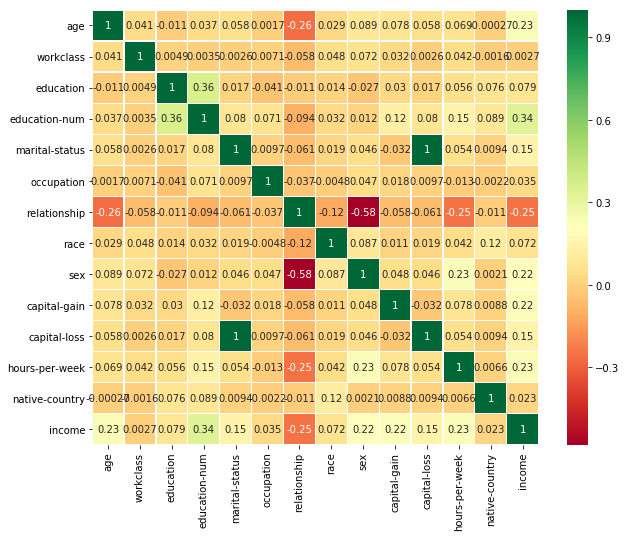

In [14]:
#correlation between features
corr = training_data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,
            cmap='RdYlGn',
            linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [15]:
#select k value for KNN model to get the best accuracy
# try K=1 through K=25 and record testing accuracy# try K=1 through K=25 and record testing 
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.7881052308322244, 0.8065308629337701, 0.8101136247312929, 0.8166649605896202, 0.8166649605896202, 0.8192240761592794, 0.8203500870099294, 0.8252635889036749, 0.8240352134302386, 0.8251612242808886, 0.8251612242808886, 0.826696693622684, 0.8285392568328386, 0.8294605384379159, 0.8275156106049749, 0.8275156106049749, 0.8263895997543249, 0.8272085167366158, 0.8265943289998976, 0.8281297983416931, 0.8284368922100522, 0.8299723615518477, 0.8267990582454704, 0.8280274337189067, 0.8284368922100522]


Text(0,0.5,'Testing Accuracy')

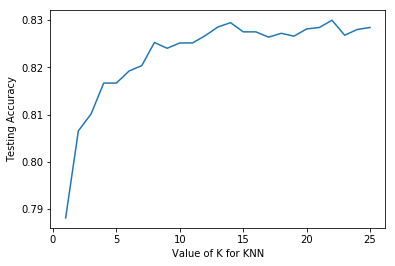

In [16]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
#plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [17]:
#KNN Model

model = KNeighborsClassifier(n_neighbors=22) #best accuracy can obtaion when k=20
model.fit(X_train,y_train)

prediction=model.predict(X_test)
prediction1=model.predict(X_train)
print('The accuracy of training data in the KNN is',metrics.accuracy_score(prediction1,y_train))
print('The accuracy of testing data in the KNN is',metrics.accuracy_score(prediction,y_test))

The accuracy of training data in the KNN is 0.8409090909090909
The accuracy of testing data in the KNN is 0.8299723615518477


In [18]:
# Use confusion matrix
y_pred = model.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
True,,,
0.0,6839,578,7417
1.0,1083,1269,2352
All,7922,1847,9769


In [19]:
#use classification report(precision, recall, f-measure)

print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

        0.0       0.86      0.92      0.89      7417
        1.0       0.69      0.54      0.60      2352

avg / total       0.82      0.83      0.82      9769

